# 1. Random walk in 1 dimensional space

case: 오른쪽으로 갈 확률과 왼쪽으로 갈 확률이 반반 같다. $P(\rightarrow)=P(\leftarrow)=1/2 \,(p=q=1/2)$

(책 7~8쪽) 오른쪽 걸음 수를 $n_{1}$, 왼쪽 걸음 수를 $n_{2}$라고 하면, 총 걸음 수는 $N=n_{1}+n_{2}$이고, 알짜 걸음 수는 $m\equiv n_{1}-n_{2}$이다.

$<N>=<n_{1}+n_{2}>=<n_{1}>+<n_{2}>=pN+qN=(p+q)N=N$

$<m>=<n_{1}-n_{2}>=<n_{1}>-<n_{2}>=pN-qN=(p-q)N$

한편, $m=n_{1}-n_{2}=2n_{1}-N$ 이므로, 

$\Delta m\equiv m-<m>=(2n_{1}-N)-(2<n_{1}>-N)$

$=2(n_{1}-<n_{1}>$

$=2 \Delta n_{1}$

$<(\Delta m)^{2}>=4<(\Delta n_{1})^{2}>=4pqN=4(1/2)(1/2)N=N$

$\therefore \, <(\Delta m)^{2}>^{1/2}=N^{1/2}$

Python으로 구현하기 위해서 먼저 numpy 와 matplotlib.pyplot을 import하자. 

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from tqdm import tqdm_notebook

numpy의 random package에서 binomial distribution을 구현할 수 있다. 먼저 step의 개수가 10일때를 보자.(origin:0)

P((-10))= 0.00115
P((-8))= 0.01024
P((-6))= 0.04419
P((-4))= 0.11592
P((-2))= 0.2061
P((0))= 0.24702
P((2))= 0.20385
P((4))= 0.1184
P((6))= 0.04301
P((8))= 0.00901
P((10))= 0.00111



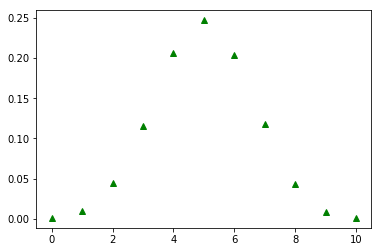

In [8]:
n,p=10,.5
s1=np.random.binomial(n,p,100000) #숫자 100000이 들어간 부분은 100000번 반복했다는 뜻-> 신뢰도가 높아짐
px1=[]
py1=[]
Displacement=0
for i in range(n+1):
    print("P((%d))="%(i+(-1)*(10-i)),sum(s1==i)/100000)   #i는 오른쪽(+1)으로 이동한 step의 수! 즉 (10-i)는 왼쪽(-1)으로 이동한 수
    px1.append(i)
    py1.append(sum(s1==i)/100000)
    Displacement+=sqrt((i+(-1)*(10-i))**2)*(sum(s1==i)/100000)
print()

plt.plot(px1,py1,'g^')
plt.show()

앞에서 정의해 놓은 displacement는 최종 변위값의 기댓값이다.

In [9]:
print(Displacement)

2.4569799999999997


아예 Dist 함수를 만들자

In [10]:
def Dist(t):
    s=np.random.binomial(t,p,100000)
    Displacement=0
    for j in range(t+1):
        Displacement+=sqrt((j+(-1)*(t-j))**2)*(sum(s==j)/100000)
        
    return Displacement

In [11]:
Dist(10)

2.4607999999999994

HBox(children=(IntProgress(value=0, max=31), HTML(value='')))

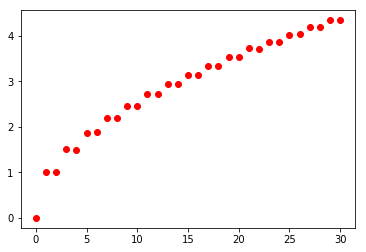

In [17]:
px=[]
py=[]
total=tqdm_notebook(range(31))
for xx in total:
    px.append(xx)
    py.append(Dist(xx))
    
plt.plot(px,py,'ro')
plt.show()

logscale로 그려보자.

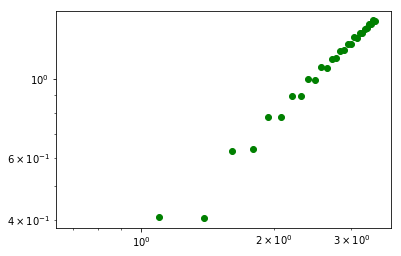

In [36]:
from math import log

lnpx=[]
lnpy=[]
for k in range(30):
    lnpx.append(log(px[k+1]))
    lnpy.append(log(py[k+1]))
    
plt.plot(lnpx,lnpy,'go')
plt.xscale('log')
plt.yscale('log')
plt.show()

이제 model fitting을 위해서 scipy.optimize package에서 curve_fit을 import하자